In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


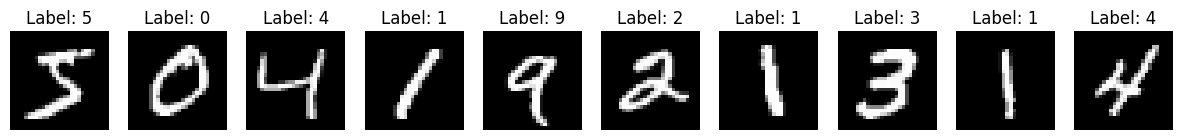

In [3]:
#visualize some of the images
import matplotlib.pyplot as plt
import numpy as np

# Number of digits to display
num_images = 10

plt.figure(figsize=(15, 4))
for i in range(num_images):
    # pick the image
    img = x_train_full[i]

    # decode one-hot label
    label = y_train_full[i]

    # plot
    plt.subplot(1, num_images, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.show()

In [4]:
# Normalize the pixel values (0-255) to range [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Reshape the input data to have a single channel (for CNN compatibility)
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Split training data into 50% train, 25% validation, 25% test
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [7]:
print(y_train[0])
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train_cat[0])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
# Build a simple CNN model
model = tf.keras.Sequential([
    #####
    tf.keras.layers.Conv2D(32, (3, 3), use_bias=False, input_shape=(28, 28, 1)), #number of kernels and then size of kernels
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'), # flow is Conv → BatchNorm → Activation → Pooling/Dropout

    tf.keras.layers.Conv2D(64, (3,3), use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),
    #####

    tf.keras.layers.Flatten(),# makes conv features usable by dense layers
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('sigmoid'),#learns abstract combinations of digit features.
    tf.keras.layers.Dropout(0.5),#regularizes to avoid overfitting.
    tf.keras.layers.Dense(10, activation='softmax')  #  10 classes for digits 0-9, produces the probability distribution over digits 0–9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,746 (1.93 MB)

 Trainable params: 504,042 (1.92 MB)

 Non-trainable params: 704 (2.75 KB)

None


In [11]:
# Train the model and store the history
history = model.fit(x_train, y_train_cat, epochs=15, validation_data=(x_val, y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 160s 166ms/step - accuracy: 0.8241 - loss: 0.6803 - val_accuracy: 0.9815 - val_loss: 0.0726
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 155s 165ms/step - accuracy: 0.9650 - loss: 0.1378 - val_accuracy: 0.9840 - val_loss: 0.0574
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 162s 173ms/step - accuracy: 0.9757 - loss: 0.0903 - val_accuracy: 0.9887 - val_loss: 0.0355
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 156s 166ms/step - accuracy: 0.9834 - loss: 0.0637 - val_accuracy: 0.9875 - val_loss: 0.0401
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 156s 166ms/step - accuracy: 0.9835 - loss: 0.0568 - val_accuracy: 0.9897 - val_loss: 0.0346
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 167ms/step - accuracy: 0.9837 - loss: 0.0527 - val_accuracy: 0.9894 - val_loss: 0.0326
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 160s 171ms/step - accuracy: 0.9871 - loss: 0.0425 - val_accuracy: 0.9894 - val_loss: 0.0345
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 162s 173ms/step - accuracy: 0.9874 -

In [13]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'\nTest accuracy: {test_acc}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9936 - loss: 0.0209

Test accuracy: 0.9937333464622498


In [14]:
# Plot training & validation accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

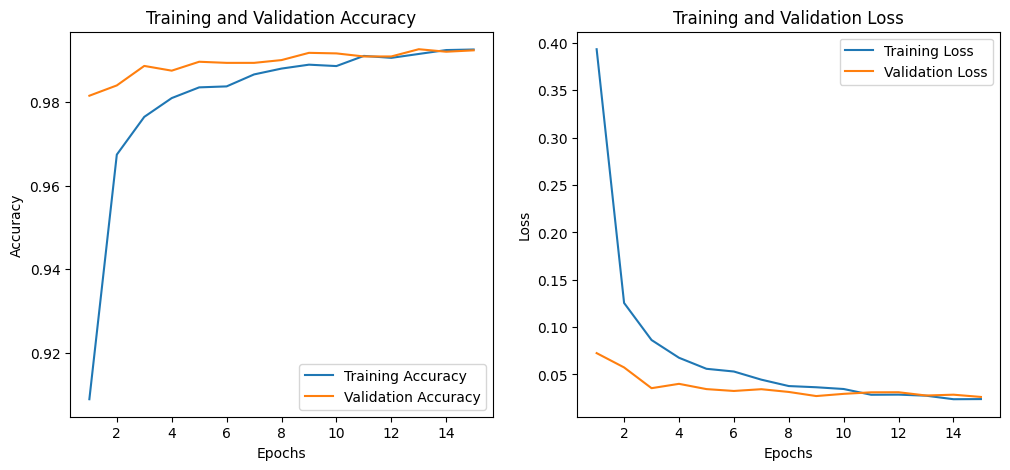

In [19]:

# Call the function to plot the training history
plot_training_history(history)

In [20]:
# Generate ROC curve for each class
def plot_roc_curves(y_true, y_pred):
    # Binarize the labels
    y_true_bin = label_binarize(y_true, classes=np.arange(10))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        fpr[i] = 1/fpr[i]
        fpr[i][np.isnan(fpr[i])] = 0

    # Plot all ROC curves
    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap('tab10')
    for i in range(10):
        plt.plot(tpr[i], fpr[i], color=colors(i), lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.5f})')

    #plt.plot([0, 1], [0, 1], 'k--', lw=2)
    #plt.xscale("log")
    plt.yscale("log")
    plt.xlim([0.7, 1.0])
    #plt.ylim([1., 100000])
    plt.ylabel('1/False Positive Rate')
    plt.xlabel('True Positive Rate')
    plt.title('ROC Curves for Each Digit')
    plt.legend(loc='lower left')
    plt.show()

469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step


/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipython-input-1461442957.py:13: RuntimeWarning: divide by zero encountered in divide
  fpr[i] = 1/fpr[i]
/tmp/ipyth

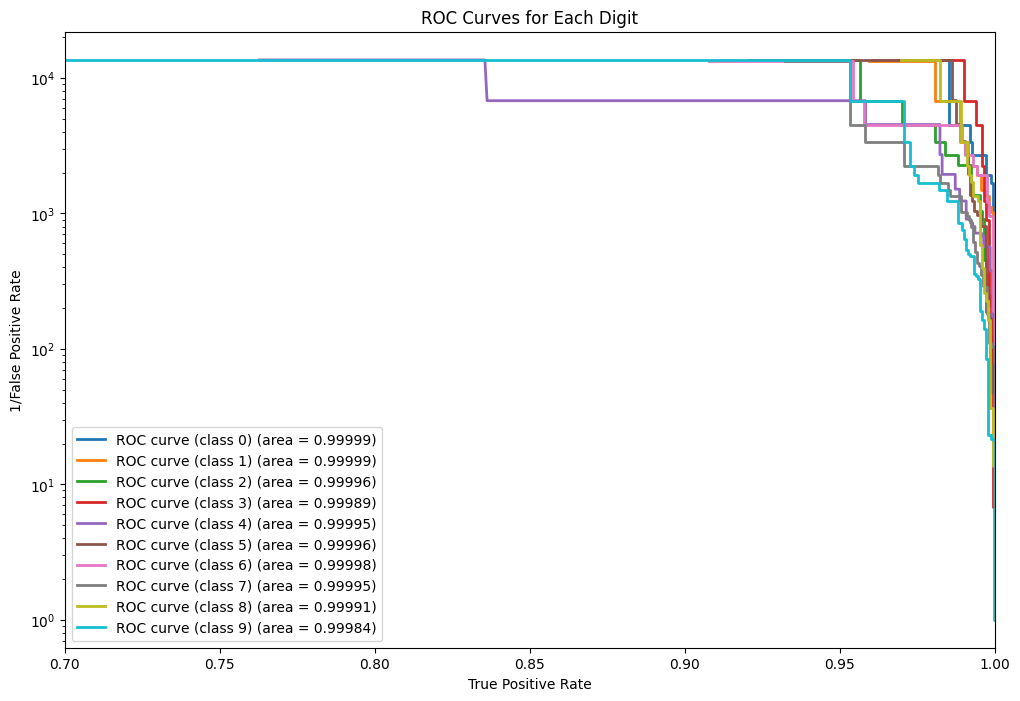

In [23]:
# Get model predictions
y_pred_prob = model.predict(x_test)
# Plot ROC curves
plot_roc_curves(y_test, y_pred_prob)

In [24]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

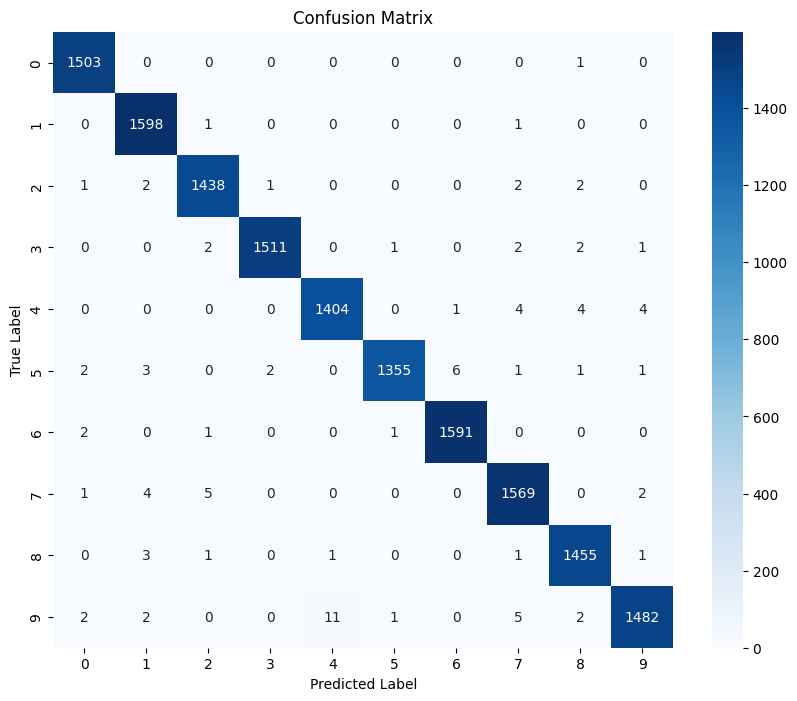

In [25]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_prob)